<a href="https://colab.research.google.com/github/jdberkson/OPTI-556-Computational-Imaging/blob/main/Homework2_JoelB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 OPTI 556 Computational Imaging

### Joel Berkson

In [45]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import numpy as np
from google.colab import files
import matplotlib as mpl
from skimage import io
from scipy.signal import convolve2d, convolve
from skimage import color, data, restoration, exposure
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import scipy
import math as mt
import warnings
import pywt
warnings.filterwarnings('ignore')

####Image Deblurring and Denoising

I've been doing a lot of camera calibration these days, so I figured I would use a calibration board image for this part.

--2021-09-18 01:34:56--  https://raw.githubusercontent.com/jdberkson/OPTI-556-Computational-Imaging/master/CameraCalib1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25631311 (24M) [application/octet-stream]
Saving to: ‘CameraCalib1.jpg.6’

CameraCalib1.jpg.6  100%[===================>]  24.44M   107MB/s    in 0.2s    

2021-09-18 01:34:57 (107 MB/s) - ‘CameraCalib1.jpg.6’ saved [25631311/25631311]

(2000, 4000)


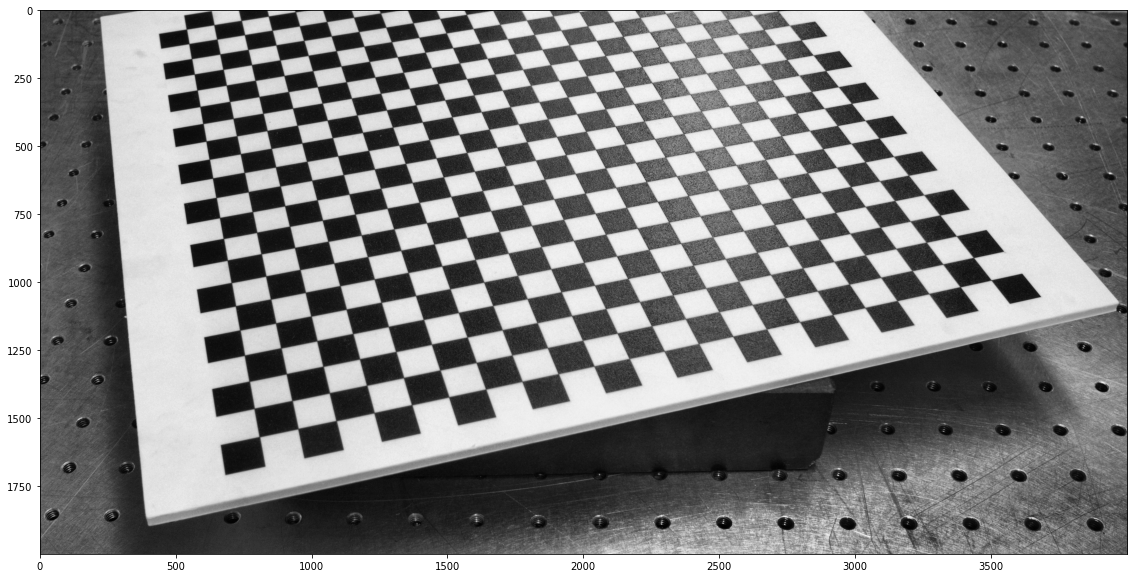

In [31]:
!wget https://raw.githubusercontent.com/jdberkson/OPTI-556-Computational-Imaging/master/CameraCalib1.jpg
calib=io.imread('CameraCalib1.jpg',as_gray=True)
plt.rcParams['figure.figsize'] = [20, 10]
calib = calib[1000:3000,1000:5000]
calib = exposure.equalize_adapthist(calib)
plt.imshow(calib,cmap=plt.cm.gray)
print(np.shape(calib))


Add noise and gaussian blurring:

In [36]:
snr = 10
xrange = np.linspace(-3,3,32)

x,y = np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf = psf/np.sum(np.sum(psf))
calibed_blur = convolve2d(calib,psf,'same')
calibed_noise = calib + calib.std() * np.random.standard_normal(calib.shape)/snr
calibed_blurnoise =calibed_noise+calibed_blur

deconvolved = restoration.wiener(calibed_blur, psf,1/snr)
deconvolvedRL=restoration.richardson_lucy(calibed, psf, iterations=50)
deconvolved_noiseonly = restoration.wiener(calibed_noise, psf,1/snr)
deconvolvedRL_noisyonly = restoration.richardson_lucy(calibed_noise, psf, iterations=50)
deconvolved_blurnoise = restoration.wiener(calibed_blurnoise, psf,1/snr)
deconvolvedRL_blurnoise = restoration.richardson_lucy(calibed_blurnoise, psf, iterations=50)

Text(0.5, 1.0, 'EM')

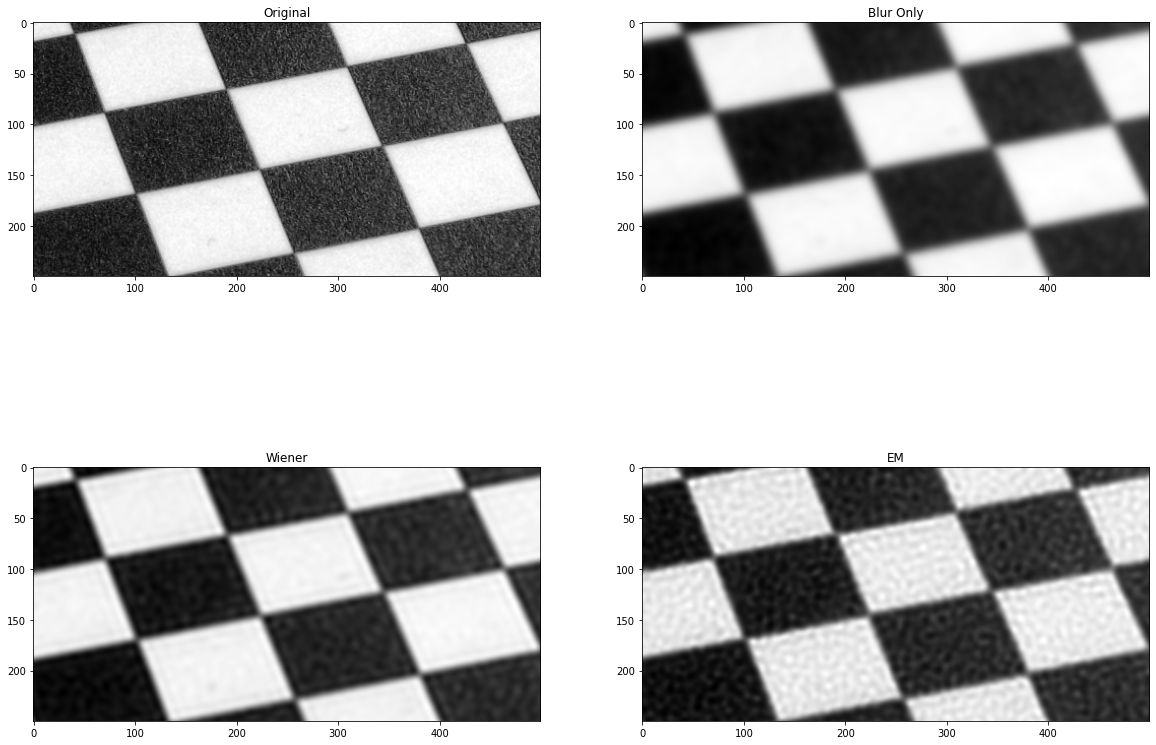

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.gray()

ax[0,0].imshow(calib[750:1000,1500:2000])
ax[0,0].set_title('Original')
ax[0,1].imshow(calibed_blur[750:1000,1500:2000])
ax[0,1].set_title('Blur Only')
ax[1,0].imshow(deconvolved[750:1000,1500:2000])
ax[1,0].set_title('Wiener')
ax[1,1].imshow(deconvolvedRL[750:1000,1500:2000])
ax[1,1].set_title('EM')


ValueError: ignored

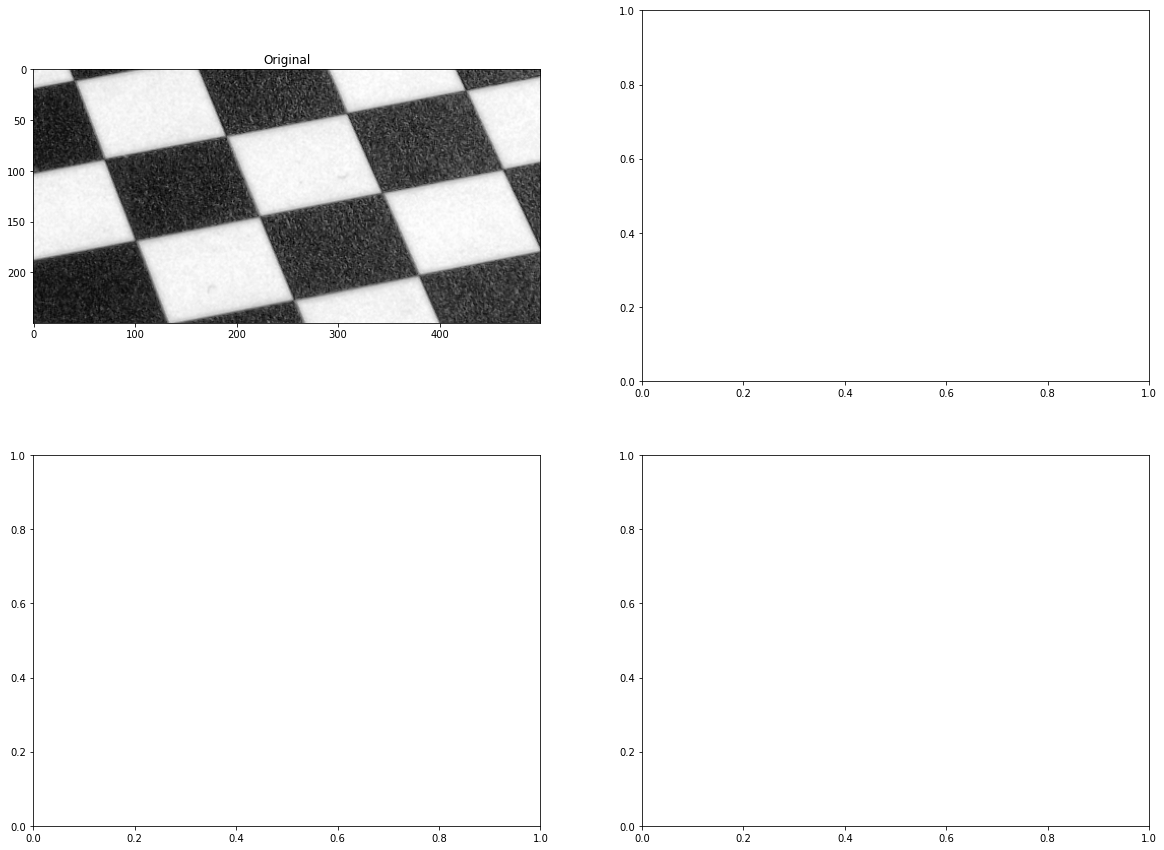

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.gray()

ax[0,0].imshow(calib[750:1000,1500:2000])
ax[0,0].set_title('Original')

ax[0,1].imshow(calibed_blur[750:1000,1500:2000])
ax[0,1].set_title('Blur and Noise')
ax[1,0].imshow(deconvolved_noiseonly[750:1000,1500:2000])
ax[1,0].set_title('Wiener')
ax[1,1].imshow(deconvolvedRL_noisyonly[750:1000,1500:2000])
ax[1,1].set_title('EM')


Text(0.5, 1.0, 'EM')

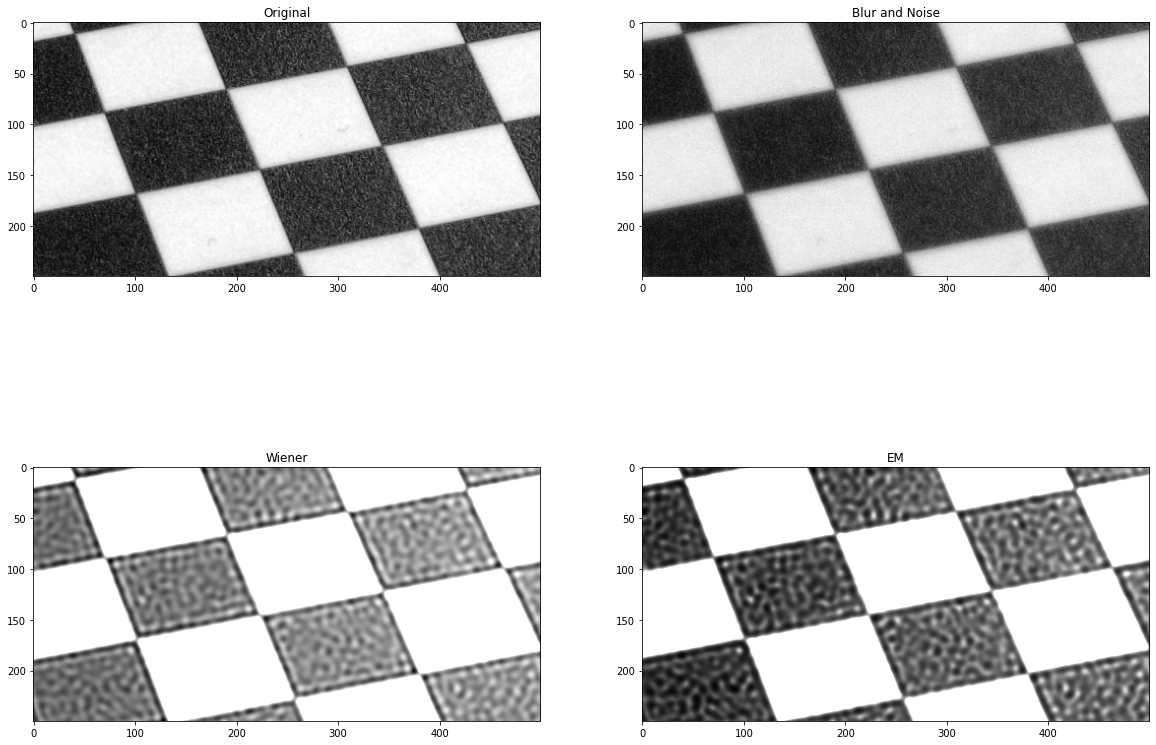

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.gray()

ax[0,0].imshow(calib[750:1000,1500:2000])
ax[0,0].set_title('Original')
ax[0,1].imshow(calibed_blurnoise[750:1000,1500:2000])
ax[0,1].set_title('Blur and Noise')
ax[1,0].imshow(deconvolved_blurnoise[750:1000,1500:2000])
ax[1,0].set_title('Wiener')
ax[1,1].imshow(deconvolvedRL_blurnoise[750:1000,1500:2000])
ax[1,1].set_title('EM')
